In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Global_Superstore(CSV).csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


#Data Cleaning


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Postal Code' with 0
df['Postal Code'] = df['Postal Code'].fillna(0)

# Example: Fill missing values in 'Profit' with the mean
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())

# Example: Remove rows with missing values in 'Ship Date'
df.dropna(subset=['Ship Date'], inplace=True)

# Verify that missing values have been handled
print(df.isnull().sum())


Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Postal Code       0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0

In [5]:
# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows after removing duplicates: 1000


In [6]:
# Calculate IQR for 'Sales'
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# Handle outliers (e.g., replace with bounds or remove)
# Option 1: Replace with bounds
df['Sales'] = np.clip(df['Sales'], lower_bound, upper_bound)

# Option 2: Remove outliers
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Verify outlier handling
print(f"Number of rows after outlier handling: {len(df)}")


# Example using Z-score for 'Profit'
from scipy import stats
z = np.abs(stats.zscore(df['Profit']))
df_no_outliers = df[(z < 3)] # Remove points where Z-score > 3

print(f"Number of rows after Z-score outlier handling: {len(df_no_outliers)}")


Number of rows after outlier handling: 1000
Number of rows after Z-score outlier handling: 981


# Statistical Analysis:

In [7]:
# Calculate descriptive statistics for 'Sales'
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_std = df['Sales'].std()
sales_var = df['Sales'].var()

print(f"Sales Mean: {sales_mean}")
print(f"Sales Median: {sales_median}")
print(f"Sales Standard Deviation: {sales_std}")
print(f"Sales Variance: {sales_var}")

# Calculate descriptive statistics for 'Profit'
profit_mean = df['Profit'].mean()
profit_median = df['Profit'].median()
profit_std = df['Profit'].std()
profit_var = df['Profit'].var()

print(f"Profit Mean: {profit_mean}")
print(f"Profit Median: {profit_median}")
print(f"Profit Standard Deviation: {profit_std}")
print(f"Profit Variance: {profit_var}")

# Calculate descriptive statistics for 'Quantity'
quantity_mean = df['Quantity'].mean()
quantity_median = df['Quantity'].median()
quantity_std = df['Quantity'].std()
quantity_var = df['Quantity'].var()

print(f"Quantity Mean: {quantity_mean}")
print(f"Quantity Median: {quantity_median}")
print(f"Quantity Standard Deviation: {quantity_std}")
print(f"Quantity Variance: {quantity_var}")


Sales Mean: 1691.1902000000002
Sales Median: 1585.115
Sales Standard Deviation: 1188.2687833344805
Sales Variance: 1411982.7014472065
Profit Mean: 288.92044000000004
Profit Median: 190.685
Profit Standard Deviation: 574.5047819568588
Profit Variance: 330055.7444912978
Quantity Mean: 5.558
Quantity Median: 5.0
Quantity Standard Deviation: 2.718460230723659
Quantity Variance: 7.390026026026131


In [8]:
# Compute the correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Quantity']].corr()

# Display the correlation matrix
print(correlation_matrix)




             Sales    Profit  Quantity
Sales     1.000000  0.489686  0.553024
Profit    0.489686  1.000000  0.154481
Quantity  0.553024  0.154481  1.000000


#Data Visualization

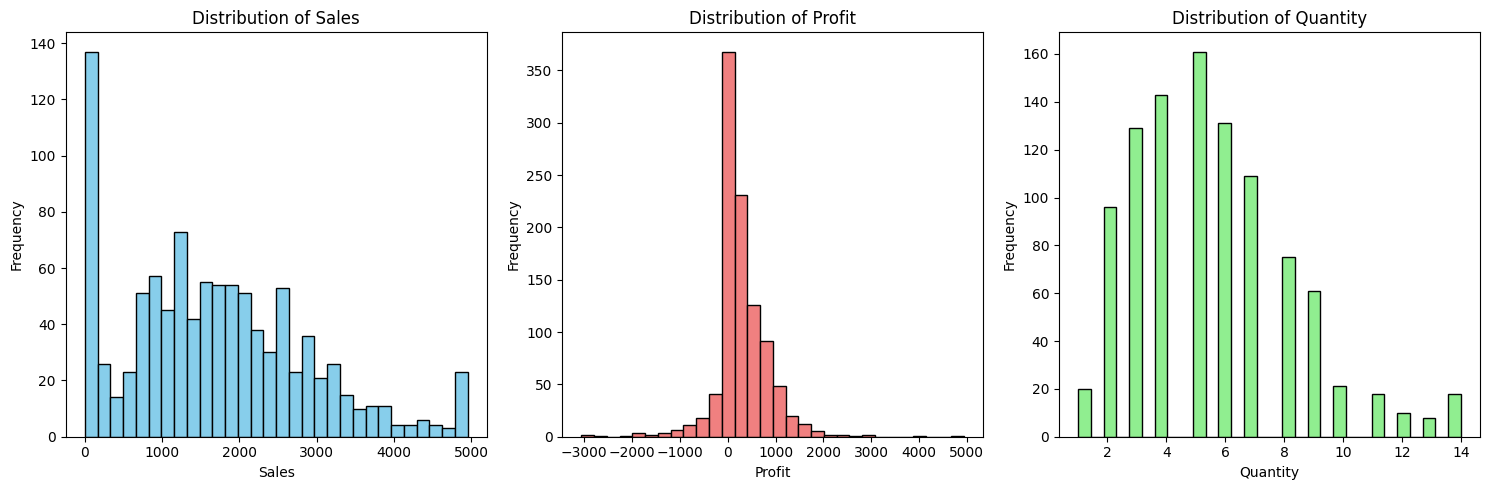

In [9]:
# Plot histograms for 'Sales', 'Profit', and 'Quantity'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

plt.subplot(1, 3, 2)
plt.hist(df['Profit'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')

plt.subplot(1, 3, 3)
plt.hist(df['Quantity'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

plt.tight_layout()
plt.show()


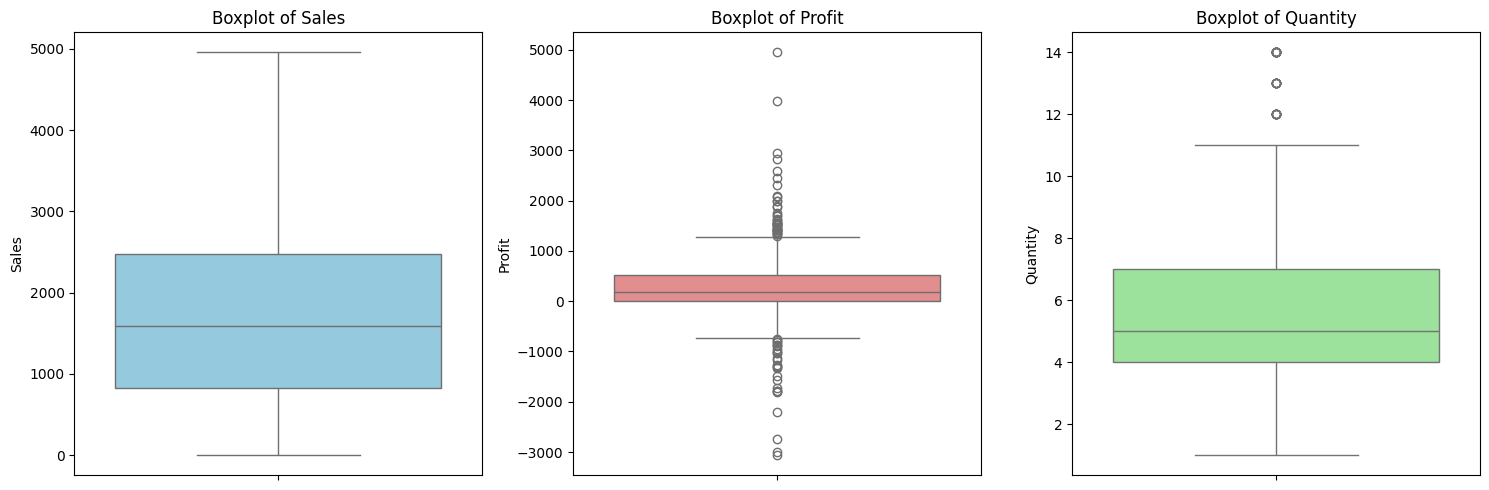

In [10]:
# Create boxplots for 'Sales', 'Profit', and 'Quantity'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Sales'], color='skyblue')
plt.title('Boxplot of Sales')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Profit'], color='lightcoral')
plt.title('Boxplot of Profit')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Quantity'], color='lightgreen')
plt.title('Boxplot of Quantity')

plt.tight_layout()
plt.show()


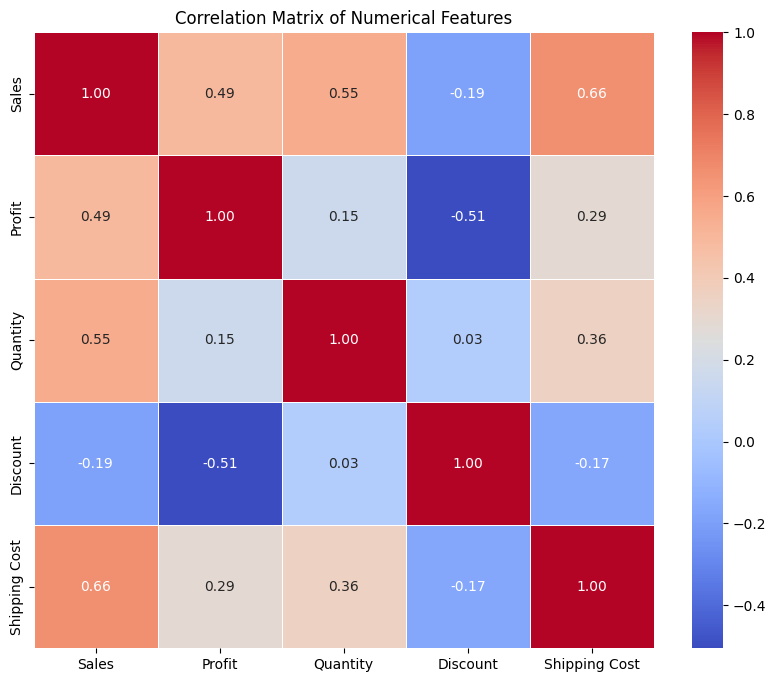

In [11]:
numerical_features = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']  # Add more features as needed

# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
